# Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def load_data(file_path):
    """Load data from a CSV file into a pandas DataFrame."""
    try:
        data = pd.read_csv(file_path, sep=';')
        print("Data loaded successfully.")
        return data
    except Exception as e:
        print(f"An error occurred while loading the data: {e}")
        return None

def summarize_data(data):
    """Generate summary statistics of the DataFrame."""
    if data is not None:
        summary = data.describe()
        print("Data summary:")
        #print(summary)
        return summary
    else:
        print("No data to summarize.")
        return None

In [3]:
data = load_data("../data/apac_data.csv")
summarize_data(data)

Data loaded successfully.
Data summary:


,EVENTS,FATALITIES,POPULATION_EXPOSURE,ID
count,197730.000000,197730.000000,9.976600e+04,197730.000000
mean,3.459632,2.036479,9.523680e+04,1538.280291
std,7.029385,9.795868,2.026675e+05,993.437542
min,1.000000,0.000000,1.000000e+00,1.000000
25%,1.000000,0.000000,1.054400e+04,593.000000
50%,1.000000,0.000000,3.482700e+04,1314.000000
75%,3.000000,0.000000,9.525400e+04,2283.000000
max,190.000000,618.000000,5.030356e+06,4157.000000


In [4]:
data.head()

,WEEK,REGION,COUNTRY,ADMIN1,EVENT_TYPE,SUB_EVENT_TYPE,EVENTS,FATALITIES,POPULATION_EXPOSURE,DISORDER_TYPE,ID,CENTROID_LATITUDE,CENTROID_LONGITUDE
0,31-dicembre-2016,Caucasus and Central Asia,Afghanistan,Badakhshan,Battles,Armed clash,6,15,NaN,Political violence,1,"36,966","73,3417"
1,07-gennaio-2017,Caucasus and Central Asia,Afghanistan,Badakhshan,Battles,Armed clash,5,28,NaN,Political violence,1,"36,966","73,3417"
2,21-gennaio-2017,Caucasus and Central Asia,Afghanistan,Badakhshan,Battles,Armed clash,1,4,NaN,Political violence,1,"36,966","73,3417"
3,04-febbraio-2017,Caucasus and Central Asia,Afghanistan,Badakhshan,Battles,Armed clash,1,4,NaN,Political violence,1,"36,966","73,3417"
4,11-febbraio-2017,Caucasus and Central Asia,Afghanistan,Badakhshan,Battles,Armed clash,4,41,NaN,Political violence,1,"36,966","73,3417"


In [5]:
data.value_counts()

WEEK              REGION                     COUNTRY      ADMIN1            EVENT_TYPE                  SUB_EVENT_TYPE             EVENTS  FATALITIES  POPULATION_EXPOSURE  DISORDER_TYPE       ID    CENTROID_LATITUDE  CENTROID_LONGITUDE
01-agosto-2020    Caucasus and Central Asia  Afghanistan  Badakhshan        Battles                     Armed clash                1       1           32289.0              Political violence  1     36,966             73,3417               1
21-agosto-2021    South Asia                 India        Puducherry        Protests                    Peaceful protest           2       0           49552.0              Demonstrations      1281  11,927             79,7804               1
                                             Nepal        Lumbini           Riots                       Mob violence               1       0           20381.0              Political violence  2078  28,1               82,5221               1
                                         

In [7]:
print(data['EVENT_TYPE'].value_counts())

EVENT_TYPE
Protests                      77400
Violence against civilians    26894
Riots                         24619
Battles                       23503
Explosions/Remote violence    23085
Strategic developments        22229
Name: count, dtype: int64


In [8]:
print(data['SUB_EVENT_TYPE'].value_counts())

SUB_EVENT_TYPE
Peaceful protest                       67117
Attack                                 22392
Armed clash                            22307
Mob violence                           14483
Remote explosive/landmine/IED          11160
Violent demonstration                  10136
Protest with intervention               9559
Looting/property destruction            5269
Arrests                                 5023
Air/drone strike                        4752
Shelling/artillery/missile attack       4666
Disrupted weapons use                   4209
Abduction/forced disappearance          3819
Other                                   3800
Change to group/activity                2836
Grenade                                 1909
Agreement                                816
Non-state actor overtakes territory      748
Excessive force against protesters       724
Sexual violence                          683
Suicide bomb                             592
Government regains territory            

In [ ]:
# pd.DataFrame(data['EVENT_TYPE'].value_counts()).to_csv('../data/event_type_counts.csv', sep=';')

In [ ]:
print(data.groupby('COUNTRY')['EVENTS'].sum().sort_values(ascending=False))

COUNTRY
India                       194826
Pakistan                    108247
Myanmar                      96280
Afghanistan                  68495
South Korea                  43999
Bangladesh                   32817
Nepal                        24669
Indonesia                    23596
Philippines                  18317
China                        16941
Thailand                     13146
Japan                        13042
Sri Lanka                     8843
Taiwan                        6983
Australia                     4109
Cambodia                      2456
Malaysia                      1545
Papua New Guinea              1319
New Zealand                   1149
Mongolia                       758
Vietnam                        569
North Korea                    566
Maldives                       389
New Caledonia                  381
French Polynesia               162
East Timor                      80
Guam                            60
Laos                            54
Solomon Isla

In [ ]:
print(data.groupby('COUNTRY')['POPULATION_EXPOSURE'].sum().sort_values(ascending=False))

COUNTRY
India                       2.728758e+09
Pakistan                    1.677425e+09
Myanmar                     1.219752e+09
Afghanistan                 9.092316e+08
Bangladesh                  7.227659e+08
Philippines                 4.624176e+08
China                       4.020758e+08
Indonesia                   3.822990e+08
Nepal                       3.075370e+08
South Korea                 2.838715e+08
Japan                       1.347886e+08
Taiwan                      7.605252e+07
Thailand                    5.184452e+07
Sri Lanka                   3.714124e+07
Maldives                    2.280541e+07
Australia                   1.959088e+07
Papua New Guinea            1.566540e+07
Malaysia                    1.040534e+07
New Zealand                 1.032009e+07
North Korea                 7.879911e+06
Cambodia                    7.045565e+06
Mongolia                    2.855375e+06
East Timor                  2.677160e+06
Vietnam                     1.815293e+06
New Cale

In [ ]:
print(data.groupby('COUNTRY')['FATALITIES'].sum().sort_values(ascending=False))

COUNTRY
Afghanistan                 203233
Myanmar                      98367
Pakistan                     53153
Philippines                  18295
India                        13353
Bangladesh                    8150
Thailand                      3397
Indonesia                     1720
Papua New Guinea              1308
Sri Lanka                      528
Nepal                          388
Cambodia                       252
Vietnam                        147
North Korea                    139
China                          107
Malaysia                        54
Laos                            38
New Caledonia                   19
Solomon Islands                  9
Australia                        7
East Timor                       4
Japan                            1
Vanuatu                          1
Maldives                         1
Mongolia                         1
New Zealand                      1
Samoa                            0
Tonga                            0
South Korea 

In [29]:
print(data.groupby('COUNTRY')[['EVENTS', 'FATALITIES']].sum().sort_values(by='EVENTS', ascending=False)[:15])

             EVENTS  FATALITIES
COUNTRY                        
India        194826       13353
Pakistan     108247       53153
Myanmar       96280       98367
Afghanistan   68495      203233
South Korea   43999           0
Bangladesh    32817        8150
Nepal         24669         388
Indonesia     23596        1720
Philippines   18317       18295
China         16941         107
Thailand      13146        3397
Japan         13042           1
Sri Lanka      8843         528
Taiwan         6983           0
Australia      4109           7


In [45]:
events_by_type = pd.DataFrame(data.groupby('COUNTRY')['EVENTS'].sum().sort_values(ascending=False)[:15])
events_by_type['peaceful_events'] = data[data['FATALITIES'] == 0].groupby('COUNTRY')['EVENTS'].sum()
events_by_type['not_peaceful_events'] = events_by_type['EVENTS'] - events_by_type['peaceful_events']
events_by_type['percentage_peaceful'] = (events_by_type['peaceful_events'] / events_by_type['EVENTS']) * 100
events_by_type['percentage_not_peaceful'] = (events_by_type['not_peaceful_events'] / events_by_type['EVENTS']) * 100
print(events_by_type)


events_by_type = pd.DataFrame({
    'country': events_by_type.index,
    'total_events': events_by_type['EVENTS'].values,
    'peaceful_events': events_by_type['peaceful_events'].values,
    'not_peaceful_events': events_by_type['not_peaceful_events'].values,
    'percentage_peaceful': events_by_type['percentage_peaceful'].values,
    'percentage_not_peaceful': events_by_type['percentage_not_peaceful'].values
})

events_by_type.to_csv('../data/peaceful_events.csv', index=False)



             EVENTS  peaceful_events  not_peaceful_events  \
COUNTRY                                                     
India        194826           177798                17028   
Pakistan     108247            89526                18721   
Myanmar       96280            51093                45187   
Afghanistan   68495            17029                51466   
South Korea   43999            43999                    0   
Bangladesh    32817            23359                 9458   
Nepal         24669            24106                  563   
Indonesia     23596            22338                 1258   
Philippines   18317             6015                12302   
China         16941            16816                  125   
Thailand      13146            10057                 3089   
Japan         13042            13041                    1   
Sri Lanka      8843             8602                  241   
Taiwan         6983             6983                    0   
Australia      4109     

In [ ]:
event_counts = data.groupby('COUNTRY')['EVENTS'].sum().sort_values(ascending=False)[0:15]
fatality_counts = data.groupby('COUNTRY')['FATALITIES'].sum().sort_values(ascending=False)[0:15]

In [31]:
agg = data.groupby('COUNTRY')[['EVENTS', 'FATALITIES']].sum().sort_values(by='EVENTS', ascending=False)[:15]

aggregated_data = pd.DataFrame({
    'country': agg.index,
    'events': agg['EVENTS'].values,
    'fatalities': agg['FATALITIES'].values
})

aggregated_data.to_csv('../data/event_fatalities.csv', index=False)

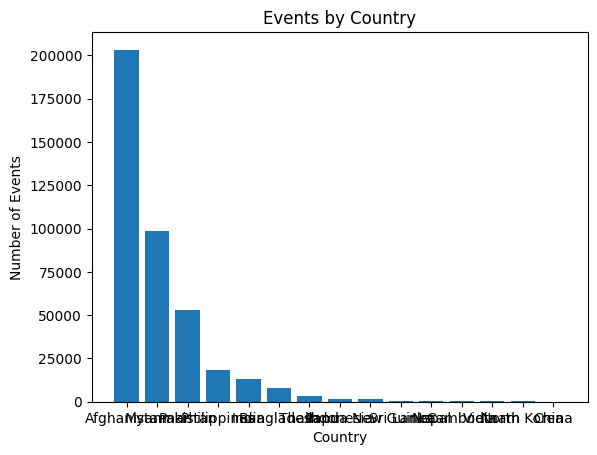

In [20]:
fig, ax = plt.subplots()
ax.bar(fatality_counts.index, fatality_counts.values)
ax.set_xlabel('Country')
ax.set_ylabel('Number of Events')
ax.set_title('Events by Country')
plt.show()

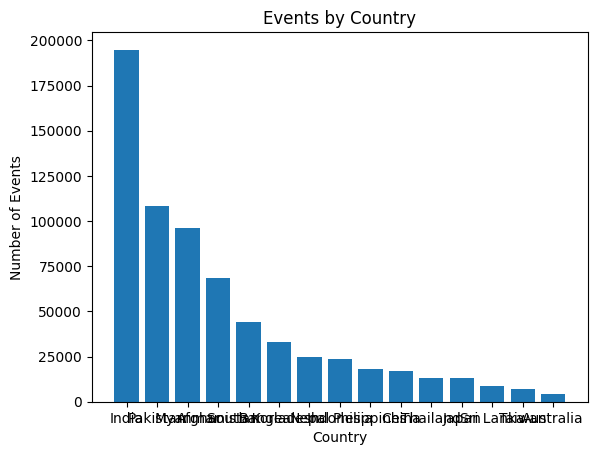

In [12]:
fig, ax = plt.subplots()
ax.bar(event_counts.index, event_counts.values)
ax.set_xlabel('Country')
ax.set_ylabel('Number of Events')
ax.set_title('Events by Country')
plt.show()